A Gentle into Gaussian Mixture Models (GMM) & Expectation–Maximization (EM) Algorithm  
-----
<br>
<center><img src="images/paranormal.jpg" width="700"/></center>

By The End Of This Session You Should Be Able To:
----

- Explain the Normal Distribution
- Define Expectation–Maximization (EM) algorithm
- List the steps of the EM algorithm
- Apply EM to a Data Science problem
- Apply EM to find the mixture of two Gaussian Distributions



Normal Distribution: A Pretty Picture
------
<center><img src="images/normal.png" width="700"/></center>

Normal Distribution: Features & Benefits
------

- Has mean & variance/standard deviation
- Function is well known
- Most of mass is in the middle
- Symmetrical
- Goes from -∞ to ∞

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

sns.set_style("white")
%matplotlib inline

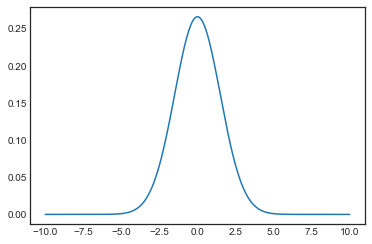

In [20]:
x = np.linspace(start=-10, stop=10, num=1000)
y = norm.pdf(x, loc=0, scale=1.5) 
plt.plot(x, y);

Discussion: What are example of data you can model with a normal distribution?
-----

<br>
<details><summary>
Click here for the solution…
</summary>
- Physical quantities (height, weight, length, ...)  
- Test scores  
- Salary  
- Anything that is sum of many independent processes. This is the heart of the Central Limit Theorem (CLT).  
</details>

Not Everything is Normal
------

<center><img src="images/abnormal.png" width="700"/></center>

Expectation–Maximization (EM) Algorithm  
-----
<br>
<center><img src="http://www.wilsonmongwe.co.za/wp-content/uploads/2015/07/400px-EM.jpg" width="400"/></center>

Limitations of MLE & MAP
-----

What are they?

1. Point estimation methods.
2. Require computation across the actual data (often there are no closed form solutions).
3. They do __not__ estimate models with missing / incomplete data.

What is Expectation–Maximization (EM) algorithm?
------

An iterative method for finding maximum likelihood (MLE) or maximum a posteriori (MAP) estimates of parameters in statistical models,when the model depends on unobserved latent variables, thus can handle missing data.

Expectation–Maximization (EM) Workflow
------
<br>
<center><img src="http://people.revoledu.com/kardi/tutorial/EM/images/EM_algorithm.png" width="500"/></center>

Alternates between performing:

- __Expectation (E)__ step: Given the parameters of the current model, guess a probability distribution over completions of the missing values.

- __Maximization (M)__ step: Given the “filled in” data, re-estimate/optimitize the parameters to update the model.

EM, more formally
-----

Alternates between performing:

- __Expectation (E)__ step: Using the current estimate for the parameters, create function for the expectation of the log-likelihood.  

- __Maximization (M)__ step: Computes parameters maximizing the expected log-likelihood found on the E step. 

The M parameter-estimates are then used to determine the distribution of the latent variables in the next E step.

[Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)

EM example: 🐥 & 🐣
------

<center><img src="images/green.png" width="500"/></center>

We have a circular problem ∞...

If only we knew the cluster centroids, we could assign the data points to the closest clusters.   
If only we knew which clusters the data points belong to, we could compute their centroids.  

How do we assign points-to-clusters and clusters-to-points?

Here is how we gonna solve it:
-----

1. We start by randomly placing cluster centroids.

2. Then, we assign each data point to a cluster based on minimum distance.

3. Then, we compute the centers of those new clusters and move the centroids to that position.

4. Repeat step 2-3 until we get bored (or the centroids stop moving around).

Check for understanding
-----

How is problem generally solved?

<center><img src="https://cdn.meme.am/cache/instances/folder852/75679852.jpg" width="300"/></center>

__k-means__, aka the kind of clustering you should always do first.

<center><img src="images/e_1.png" height="500"/></center>

<center><img src="images/m_1.png" height="500"/></center>

What do we do next?

<center><img src="images/kmeans.png" width="500"/></center>

Source p435 of Pattern Recognition and Machine Learning by Bishop

A kinder, _softer_ k-means
-----

A “soft" version of $k$-means. 

Instead of assigning each point to just one cluster (hard clustering), EM will attach a probability to the membership of a point in each cluster (P(cluster|point)). 

A data point can thus belong to several clusters (though with different probabilities).

<center><img src="https://cdn.meme.am/instances/250x250/63984114.jpg" width="500"/></center>

EM is trying to maximize the following function:
------
    
<center><img src="images/em_form.png" width="500"/></center>

- X observed variable
- θ parameter of model
- Z hidden or missing variable

Complete data log likelihood
------
<br>
<center><img src="images/complete.png" width="500"/></center>

X is directly observed.  
Z is not directly observed.  

Z is a joint (related) distribution on x.

Expected complete data log likelihood
----
<br>
<center><img src="images/expected.png" width="500"/></center>

The goal of the E step is to compute:
-------

Q(θ, θ<sup>t-1</sup>)

The goals of the M step is to optimize:
------

<center><img src="images/m.png" width="500"/></center>

Check for understanding
------

How do we change to from the following MLE estimate to a MAP estimate?

<center><img src="images/map.png" width="500"/></center> 

💥💥💥

Check for understanding
------

When do stop alternating between E & M?

- Convergence (no _signficant_ improvement)
- We hit a priori stopping criteria
- We run out of budget (time or money)

EM Steps
-----

1. Initialize the parameters θ
2. Compute the best values for Z given θ  
3. Use the computed values of Z to compute a better estimate for the θ  
4. Iterate steps 2 and 3 until convergence

EM steps, stated another way
-----

1. Initialize the parameters of the models, either randomly or doing a "smart seeding"

2. E Step: Find the posterior probabilities of the latent variable given current parameter values.

3. M Step: Reestimate the parameter values given the current posterior probabilities.

4. Repeat 2-3 monitoring the likelihood function likelihood. Hope for convergence.

Check for understanding
------

What are the Z random variables in K-means?

<center><img src="images/e_1.png" height="500"/></center>

The centers of the clusters.

The centers of the clusters are new / missing / latent variables.

GMM extensions: Beyond 2 Guassians
-----

<center><img src="images/triples.jpg" width="700"/></center>

EM Applications
----

- Anytime you want to do inference when there is missing data


- Latent Variable modeling (Bayes Nets, Hidden Markov Modeling or Factor Analysis)

- Dimension reduction (PCA)

- Clustering (k-means)

- Probablistic Modeling (Topic modeling with LDA)

- Mixture Modeling (multiple processes/distributions underly a single R.V.)

EM algorithm tips n' tricks
-------

- Local maxima
- Model ties
- Overfitting

**Problem**: ***Local maxima***
--------

EM improves P(data) at each iteration, but can get stuck in local 
maxima. 

There are many suboptimal parameter configurations at which EM stops because it can not improve from there. 

The result is __not__ the best model.

**Solution**: Random restarts

EM 50 times or more with random initializations, and remember the model that
got the best data likelihood. 

Each time you restart, you start at a different point along the curve, and hopefully eventually at one that leads to the global optimum.

**Problem**: Model Ties
------

I'm estimating a complex HMM model with many nodes. Howeveer the estimated transition options leaving from one node are equally good. The results of my EM does __not__ take a stance and just leaves all of them as is.

**Solution #1**: Random restarts

Another example of local min (or saddle point). Random restarts should break "weak"/false ties.

**Solution #1**: Add more levels to Z Random Variable

This will be break the symmetry for maximizing likelihood.

**Solution #2**: Clever initialization

For example have constrained initialization, for example [k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B#Improved_initialization_algorithm)

**Problem**: The resulting model is ***overfitting***
-------

> “Look, I can predict this training data perfectly! And nothing else. . . "

**Solution**: Use MAP estimates

Add a weight to prior information (theory or historical data)

**Problem**: EM is getting worse over iterations
-------

**Solution**: Check your implementation
--------

EM is guaranteed to not get worse. However, it might get better.

Check for understanding
------

Is EM a supervised learning, unsupervised learning, reinforcement learning, or something else?

__Unsupervised learning__

There is __no__ obvious metric of success.

Check for understanding
-----

Is EM a model?

__NO__. 

It is a way to optimize a model.

Check for understanding
------

When should EM __not__ be used?

1. There is a closed form solution (for example, OLS).
1. You have complete data (use vanilla MLE or MAP).
1. Intractable to compute a EM step (most often it is M, updating parameters)

Summary
----

- Expectation–Maximization (EM) Algorithm  is a series of steps to find good parameter estimates when there is incomplete/hidden data/variables.
- EM steps
    1. Initialize the parameter estimates
    2. Given the current parameter estimates, find the min log likelihood for Z (complete data)
    3. Given the current data, find better parameter estimates
    3. Repeat steps 2 & 3
- EM works well but should not be used all the time

<br>

Bonus Material
---

https://stats.stackexchange.com/questions/30825/what-is-the-meaning-of-the-semicolon-in-fx-theta

Expectation step (E step)  
------

Calculate the expected value of the log likelihood function, with respect to the conditional distribution of $Z$  given $X$ under the current estimate of the parameters $\theta^{(t)}$:  

$$ Q(\theta | \theta^{(t)}) = E_{Z | X, \theta^{(t)}} \left[ log \text{ } L( \theta | X, Z) \right] $$


Maximization step (M step)  
----

Find the parameter that maximizes this quantity:  

$$ \theta^{(t + 1)} = argmax_{\theta} \text{ } Q(\theta | \theta^{(t)}) $$

Expotential Form for Sufficent Statistics
------

https://blog.slavv.com/the-1700-great-deep-learning-box-assembly-setup-and-benchmarks-148c5ebe6415

EM is not so much an algorithm, but rather a class of algorithms that use a 2-step procedure learning (E step, M step) to train a ***generative model***.

Generative models are joint probabilities (written $P(x,y)$) that explain how the data was, well, generated (*discriminative* models, on the other hand, are simply weight vectors that explain the conditional probability $P(x|y)$). 

Original Paper
-----

DEMPSTER, ARTHUR P./LAIRD, NAN M./RUBIN, DONALD B. (1977): Maximum likelihood from incomplete data via the EM algorithm. In: Journal of the Royal Statistical Society. Series B (Methodological), 39, Nr. 1, 1–38.

Graphical Models
---

Graphical Models are a nice way of visualizing probabilistic models, and also to express the dependencies
that hold between the individual elements. There are several types of graphical models, but the
ones we are interested in (and the ones we mean when we use the term) are ***Bayes Nets*** and ***Hidden
Markov Models*** (HMMs). Graphical models consist of two elements, ***nodes*** and ***arcs***.

The nodes are ***random variables***. Random variables are events that have some probability, and come
in different flavors. If a random variable has exactly two values, like {`on`, `off`} or {`true`, `false`}, they
are ***binary*** (in the latter case ***boolean***). If they have a list of values (something like {`red`, `green`, `blue`}
or {`chocolate`, `vanilla`, `strawberry`, `pistacchio`}), they are ***discrete***. If they have numbers as values,
they are called ***continuous***. 
The ***probabilities*** associated with each of the values of a random variable have to
sum up to $1.0$, i.e., the variable `COLOR` with the values {`red`, `green`, `blue`} could have the respective probabilities {$0.2, 0.5, 0.3$} or
{$0.33, 0.33, 0.33$} associated with the values, but not {$0.8, 0.4, 0.7$}.

Arcs are the directed links between the random variables, and you can think of them as causal relations
(there are other kinds, but it is easiest this way). They denote what influence the parent has on the
child node. This influence is expressed by a conditional probability. 

<img src="images/bn1.png" width="200px"/>
<div align="center">*Figure 1: A simple graphical model with three random variables*</div>

E.g., in a network like the one in Figure 1, we can say how likely it is that traffic ($T$) is bad, given that the weather ($W$) is rain. A node
$X$ can have several parents, which means that its value is influenced by several factors (traffic could
also be influenced by a Lakers game, $G$). If there are no links between two variables, then they are
***independent of one another***, i.e., whether the Lakers play or not luckily has no influence on the weather
$W$ (the examples in this section are largely influenced by [Russell/Norvig 2003](#refRN)).

----
Bayes Nets
--
<img src="images/bn2.png" width="450px"/>
<div align="center">*Figure 2: A Bayes Net with three random variables and associated parameters*</div>

If we combine several nodes in a network, we call it a ***Bayes Net***. Let’s look at a very simple example
(Figure 2), inspired by [Russell/Norvig 2003](#refRN). Say we have three random variables, namely the weather
($W$), with values {`sunny`, `rainy`}, traffic ($T$), which can be {`normal`, `bad`, `terrible`} and whether we are
late for a meeting ($L$: {`true`, `false`}).

From pop culture we know that it never rains in southern California, and from our meterological data
(see [section 2.1.1](#secprob)) we know that *never* means 5%. So the probabilities for $W$ are $(0.95, 0.05)$. If we
talk about the probability of a specific outcome of the variables values, we write $P(W =$ `sunny` $) = 0.95$
or shorter $P($ `sunny` $) = 0.95$.

If it rains, traffic tends to get worse, and if traffic is bad, we are more likely to be late for our meeting.
If it is sunny, the traffic behaves different than when it is rainy, so we have to specify the probability of
each value of $T$ for each value of $W$. We do that in a table, where each column is a value for a variable,
$T$ and $W$. Notice that the rows with the same value forW have to sum up to $1.0$. You can imagine that
each value for weather is a state you are in, and the different values for $T$ are options you can choose
from. Some options are more likely than others, but all probability is distributed between them (thus
summing to $1.0$). You cannot choose something that is not there.

Whether I am late for a meeting ($L$) in turn depends on the state of the traffic ($T$), so we have to
specify another table with probabilities for each value of $L$ given each value of $T$. Again you can see
that with worse traffic, our chances of being late increase.
Using the Bayes Net, we can now compute how likely we are to be late if the weather is bad but
traffic is normal, and other interesting things.

Hidden Markov Models
--

<img src="images/hmm-example.png" width="300px"/>
<div align="center">*Figure 3: A Hidden Markov Model, resulting from connecting several of the Bayes Net above in a sequence*</div>

Things change over time, but they might be connected. Tomorrow’s weather does not just happen, it
actually depends on the weather of today. If we want to capture this, we can include another kind of
conditional probabilities, namely the ones expressing how a random variable changes over time. This
is the Markov part of HMMs. To make things easier, we assume that each state depends only on the
previous one, not all previous states. This is one of the so-called ***Markov properties***. In order to 
make it a hidden Markov model, we assume that the random variable we are actually interested in is
unobservable, but related to something we can observe.

Using our example from above, we have the following scenario: one year from now, we want to get
the sequence of sunny and rainy days that occurred (see Figure 3). We do not remember the weather
($W$ is hidden), but we do have our diary, in which we noted for each day whether we were late or not
($L$ is our observed variable, and it is dependent on $W$). We just copy the Bayes net from above for
each day, and add the new transition probabilities $P(W_t | W_{t-1})$ between each of the Bayes nets. The
probability means “how likely is it to be {`rainy`, `sunny`} today if it was {`rainy`, `sunny`} yesterday".

In this case, we do have another hidden variable, $T$, but it is not necessary for HMMs in general. In most applications (such as the tagging we will see later), you only have one hidden layer. The important
part is that whether I am late one day does not depend on whether I was late the day before, but on the
*weather* on that day. Also, the traffic of today is independent of yesterday’s traffic. This is why there
are no arcs between the $T$ and $L$ variables, only the $W$ nodes. This is another Markov property, that the
observations (here, $L$) are independent of one another. We guesstimated the probabilities $P(T|W)$ and
$P(L|T)$ based on intuitions or data (we will later say, we *initialized* them), and we could now use EM
to adjust them to reflect observations, using our diary as data and reconstructing the weather one year
ago.

Scaling
--

In the examples above, we have used logarithms to prevent underflow of the probabilities. That turned
all our multiplications into additions (which is good, because it’s fast), but it also turned every addition
into a function call to a log addition (which unfortunately is very slow). There is another way to prevent
underflow, called ***scaling***, but it requires some more bookkeeping. The idea is that we normalize each 
column in our lattice so that it sums to 1. That way, the probabilities won’t get too small, and we can
still use multiplication and normal addition.

Practically, we add a vector to our forward-backward procedure. It has the same length as out lattice,
and for each position of the lattice contains the sum of the forward probabilities at that position, the
***scaling factor***. Before we move on, we normalize the column by that factor, so that it sums to 1. The 
backward pass uses the same scaling parameters as the forward pass.
We can then use the scaled forward and backward matrices as well as the scaling factor vector to
compute the fractional counts. See [Shen (2008)](#refShen) for more details (abstract mathematical notation, but
very good explanations).


Variational Bayes
--

We have earlier seen the idea of adding pseudo-counts to the fractional counts, which helps with
smoothing. Variational Bayes inference works similarly, only that now we define a prior for our prior
parameters.

A ***prior*** is essentially a curve that looks similar to what we would like to achieve (see the example
above of how EM’s distribution differs from the real one: a prior would look like the real one). In
practice, the prior here is a ***Dirichlet distribution***, which takes two parameters: a probability distribution and a vector of shape parameters. Both have the same number of elements (or dimensions). If 
we have only two dimensions in each, the prior is called a Beta function. Typically, the probability
distribution are our transition parameters, and the shape parameters are something like pseudo-counts
for each element.

This sounds rather complicated, but is relatively easy to implement. The E-step stays the same
as before. In the M-step, the elements of the shape parameter vector are added as pseudo-counts
to the matching fractional counts, and the result is passed through a ***Digamma function*** and finally
exponentiated. To normalize, we add the sum of all elements in the shape vector to our denominator
and again run it though Digamma and exponentiation. This is like a softer version of smoothing with
pseudo-counts, where we have separate counts for each parameter.



Going Further...
==

If you want to get deeper into the matter, you could look into ***EM with features*** (Berg-Kirkpatrick et al., 2010). Instead of just using conditional probabilities, which often cannot capture 
useful properties (or only when encoded as additional states), you can add all the features you like in
discriminative models (like word suffixes or capitalization) and still do unsupervised learning.

Or explore ***structural EM***, which not only learns the parameter values, but also how many parameters there should be.

If you do any of these things, or if you have questions, comments, or criticism, send me a mail—I’d
be dead curious to know!

[Source](https://github.com/dirkhovy/emtutorial/blob/master/An%20Evening%20with%20EM.ipynb)

<br>
<br>